# Module 3 Lesson 4

_This demonstration is meant to be used in parallel with the course content. To make full use of this, have both open and when you get to an example graph in the lesson, find the corresponding code here and play around with the numbers and variables to see how it changes things._

In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq

pi = 3.1415

# Noise Filtering

### Noisy signal from lesson 2

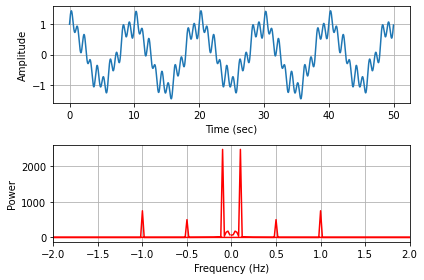

In [9]:
x = np.arange(0,50,0.01)
y = np.sin(0.1 * 2.0*np.pi * x + np.pi/2)

noise = 0.2 * np.sin(0.5 * 2.0*np.pi * x) + 0.1 * np.sin(0.05 * 2.0*np.pi * x) + 0.3 * np.sin(1 * 2.0*np.pi * x)

yf = 2 * (0.01/50) + np.abs(fft(y + noise))
xf = fftfreq(int(50/0.01), 0.01)

fig, ax = plt.subplots(2,1)
ax[0].plot(x, y + noise)
ax[1].plot(xf, yf, 'r-')

ax[0].set_xlabel("Time (sec)")
ax[1].set_xlabel("Frequency (Hz)")

ax[0].set_ylabel("Amplitude")
ax[1].set_ylabel("Power")

ax[1].set_xlim(-2, 2)

ax[0].grid()
ax[1].grid()
plt.tight_layout()
plt.show()

### Atenuated frequency domain signal

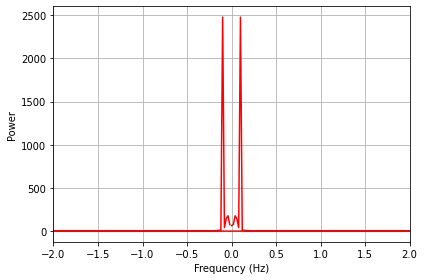

In [10]:
yf_filtered = yf

for i in range(len(xf)):
  if xf[i] < -0.3 or xf[i] > 0.3:
    yf_filtered[i] = 0

fig, ax = plt.subplots()
ax.plot(xf, yf_filtered, 'r-')

ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Power")

ax.set_xlim(-2, 2)

ax.grid()
plt.tight_layout()
plt.show()

### Inverse Fourier Transform

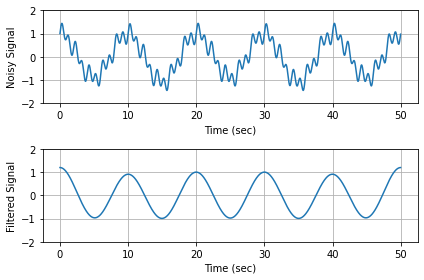

In [11]:
from scipy.fft import ifft

y_filtered = ifft(yf_filtered)
fig, ax = plt.subplots(2,1)

ax[0].plot(x, y + noise)
ax[1].plot(x, np.real(y_filtered))

ax[0].set_ylim(-2, 2)
ax[1].set_ylim(-2, 2)

ax[0].grid()
ax[1].grid()

ax[0].set_xlabel("Time (sec)")
ax[1].set_xlabel("Time (sec)")

ax[0].set_ylabel("Noisy Signal")
ax[1].set_ylabel("Filtered Signal")

plt.tight_layout()
plt.show()

# 2D Fourier Transform

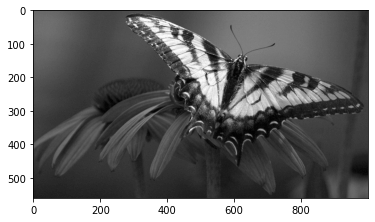

In [14]:
from skimage.color import rgb2gray
image = rgb2gray(plt.imread("./data/sample_image_1.jpg").astype(float))
plt.imshow(image, plt.cm.gray)

Text(0.5, 1.0, 'Noisy Image')

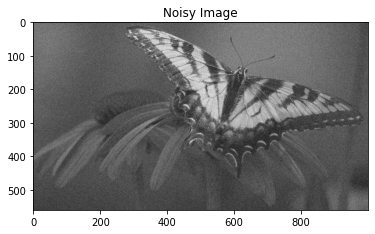

In [15]:
[row, col] = np.shape(image)
gauss = np.random.normal(0, 20,(row,col))
gauss = gauss.reshape(row,col)
noisy_image = (image + gauss)
plt.imshow(noisy_image, plt.cm.gray)
plt.title("Noisy Image")

Text(0.5, 1.0, 'Fourier Transform')

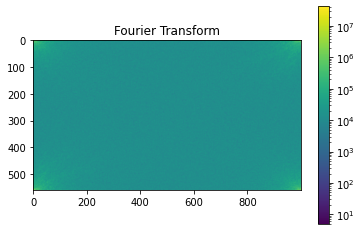

In [16]:
from scipy.fft import fft2
from matplotlib.colors import LogNorm

F_image = fft2(noisy_image)

plt.imshow(np.abs(F_image), norm=LogNorm(vmin=5))
plt.colorbar()
plt.title("Fourier Transform")

Text(0.5, 1.0, 'Filtered Spectrum')

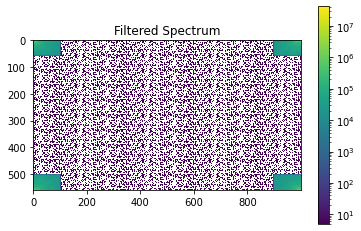

In [17]:
keep_fraction = 0.1
F_image_filtered = F_image.copy()
r, c = F_image.shape

F_image_filtered[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
F_image_filtered[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure()
plt.imshow(np.abs(F_image_filtered), norm=LogNorm(vmin=5))
plt.colorbar()
plt.title('Filtered Spectrum')

Text(0.5, 1.0, 'Denoised image')

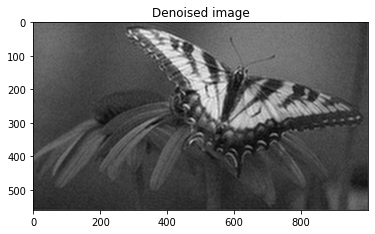

In [18]:
from scipy.fft import ifft2

image_filtered = ifft2(F_image_filtered).real
plt.imshow(image_filtered, plt.cm.gray)
plt.title("Denoised image")

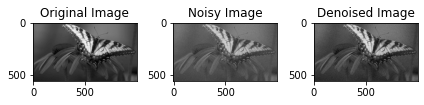

In [19]:
fig,ax = plt.subplots(1,3)
ax[0].imshow(image, plt.cm.gray)
ax[1].imshow(noisy_image, plt.cm.gray)
ax[2].imshow(image_filtered, plt.cm.gray)
ax[0].set_title("Original Image")
ax[1].set_title("Noisy Image")
ax[2].set_title("Denoised Image")

plt.tight_layout()